In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key

'67afe6a685ecbfbea9589dfb23f0600b'

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [4]:
cities

['saint george',
 'souillac',
 'torbay',
 'taolanaro',
 'birao',
 'lincoln',
 'rikitea',
 'ushuaia',
 'bur gabo',
 'sivas',
 'grand gaube',
 'gat',
 'ekhabi',
 'saldanha',
 'dikson',
 'kruisfontein',
 'puerto escondido',
 'ribeira grande',
 'jamestown',
 'cayenne',
 'upernavik',
 'san patricio',
 'busselton',
 'port alfred',
 'port blair',
 'luderitz',
 'garowe',
 'taburi',
 'punta arenas',
 'college',
 'albany',
 'colmar',
 'mataura',
 'talnakh',
 'east london',
 'butaritari',
 'hanmer springs',
 'svolvaer',
 'severnyy',
 'kavaratti',
 'yellowknife',
 'vaini',
 'avarua',
 'tasiilaq',
 'makakilo city',
 'touros',
 'mar del plata',
 'kapaa',
 'kontagora',
 'jiddah',
 'attawapiskat',
 'salalah',
 'sentyabrskiy',
 'beira',
 'fairbanks',
 'hermanus',
 'nikolskoye',
 'victor harbor',
 'hobart',
 'muisne',
 'geraldton',
 'fort saint james',
 'longyearbyen',
 'ramsar',
 'portland',
 'tsihombe',
 'novouzensk',
 'maniitsoq',
 'bredasdorp',
 'ponta do sol',
 'marcona',
 'cape town',
 'rio grande

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
# Build partial query URL

weather_response = requests.get(url)
weather_data_json = weather_response.json()
weather_data = []
record_number = 1

for city in cities:
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
    
    weather_response = requests.get(query_url)
    weather_data_json = weather_response.json()

    
    if weather_data_json['cod'] == '404':
        print('no data for this city')
        
    else: 
        print(f'Processing record for {record_number} for {city}')
        weather_data.append({
            "lat"       : weather_data_json['coord']['lat'],
            "lon"       : weather_data_json['coord']['lon'],
            "city_name" : weather_data_json['name'],
            "country"   : weather_data_json['sys']['country'],
            "date"      : weather_data_json['dt'],
            "humidity"  : weather_data_json['main']['humidity'],
            "max_temp"  : weather_data_json['main']['temp_max'],
            "cloudiness": weather_data_json['clouds']['all'],
            "windspeed" : weather_data_json['wind']['speed']
            })
        record_number = record_number + 1

Processing record for 1 for saint george
Processing record for 2 for souillac
Processing record for 3 for torbay
no data for this city
Processing record for 4 for birao
Processing record for 5 for lincoln
Processing record for 6 for rikitea
Processing record for 7 for ushuaia
no data for this city
Processing record for 8 for sivas
Processing record for 9 for grand gaube
Processing record for 10 for gat
Processing record for 11 for ekhabi
Processing record for 12 for saldanha
Processing record for 13 for dikson
Processing record for 14 for kruisfontein
Processing record for 15 for puerto escondido
Processing record for 16 for ribeira grande
Processing record for 17 for jamestown
Processing record for 18 for cayenne
Processing record for 19 for upernavik
Processing record for 20 for san patricio
Processing record for 21 for busselton
Processing record for 22 for port alfred
Processing record for 23 for port blair
Processing record for 24 for luderitz
Processing record for 25 for garowe
n

no data for this city
Processing record for 198 for monrovia
Processing record for 199 for huilong
no data for this city
Processing record for 200 for ewa beach
Processing record for 201 for hambantota
Processing record for 202 for bouna
Processing record for 203 for sorland
Processing record for 204 for columbus
Processing record for 205 for road town
Processing record for 206 for hasaki
Processing record for 207 for saint anthony
Processing record for 208 for paamiut
Processing record for 209 for port-gentil
Processing record for 210 for san luis
Processing record for 211 for niquero
Processing record for 212 for guerrero negro
Processing record for 213 for hyeres
Processing record for 214 for kurkino
Processing record for 215 for shieli
no data for this city
Processing record for 216 for norman wells
Processing record for 217 for zabid
Processing record for 218 for yar-sale
Processing record for 219 for iqaluit
no data for this city
Processing record for 220 for belmonte
Processing 

Processing record for 394 for puerto lempira
Processing record for 395 for hedensted
Processing record for 396 for matamoros
Processing record for 397 for kidal
Processing record for 398 for karasjok
Processing record for 399 for barinas
Processing record for 400 for fortuna
Processing record for 401 for broken hill
Processing record for 402 for rio gallegos
Processing record for 403 for labuhan
Processing record for 404 for quatre cocos
Processing record for 405 for mossendjo
Processing record for 406 for caceres
Processing record for 407 for fort nelson
Processing record for 408 for isangel
Processing record for 409 for curchorem
Processing record for 410 for koumac
Processing record for 411 for arroio grande
Processing record for 412 for nokaneng
Processing record for 413 for teguise
Processing record for 414 for sioux lookout
Processing record for 415 for biak
Processing record for 416 for buala
Processing record for 417 for antalaha
Processing record for 418 for shakiso
Processing

In [7]:
# Create dataframe to view collected city weather data
weather_df = pd.DataFrame(weather_data)

weather_df.head()

,city_name,cloudiness,country,date,humidity,lat,lon,max_temp,windspeed
0,Saint George,75,GR,1555775400,66,39.45,22.34,55.40,9.17
1,Souillac,0,FR,1555778168,25,45.60,-0.60,77.00,5.82
2,Torbay,90,CA,1555778004,93,47.66,-52.73,44.01,3.36
3,Birao,100,CF,1555778850,7,10.30,22.78,96.18,8.84
4,Lincoln,1,US,1555778709,30,40.80,-96.67,72.00,14.99


In [8]:
timestamp = weather_df['date'][0]
time = time.gmtime(timestamp)
report_date = f"{time[2]}/{time[1]}/{time[0]}"
report_date

'20/4/2019'

In [9]:
# Export city weather data to saved csv file
cityweather_csv = weather_df.to_csv('weather_data.csv')

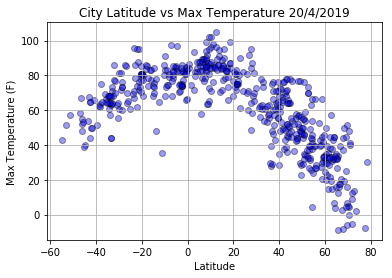

In [10]:
# City Latitude vs Max Temperature(F) scatter plot
x_axis = weather_df["lat"]
y_axis = weather_df["max_temp"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.4)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.title(f"City Latitude vs Max Temperature {report_date}")

plt.savefig('City_Latitude_vs_MaxTemp')
plt.grid(True)
plt.show()

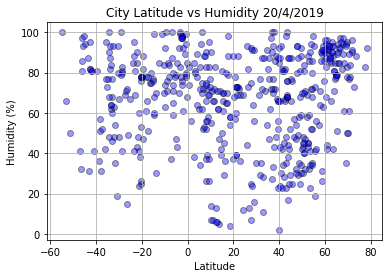

In [11]:
# City Latitude vs Percentage of Humidity scatter plot
x_axis = weather_df["lat"]
y_axis = weather_df["humidity"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.4)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.title(f"City Latitude vs Humidity {report_date}")
plt.savefig("City_Latitude_vs_Humidity")
plt.grid(True)
plt.show()

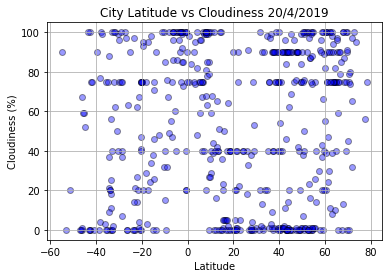

In [12]:
#City Latitude vs Percentage of Cloudiness scatter plot
x_axis = weather_df["lat"]
y_axis = weather_df["cloudiness"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.4)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.title(f"City Latitude vs Cloudiness {report_date}")
plt.savefig("City_Latitude_vs_Cloudiness")
plt.grid(True)
plt.show()

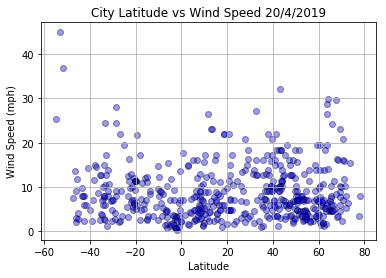

In [13]:
# City Latitude vs Wind Speed(mph)
x_axis = weather_df["lat"]
y_axis = weather_df["windspeed"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.4)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.title(f"City Latitude vs Wind Speed {report_date}")
plt.savefig("City_Latitude_vs_Wind_Speed")
plt.grid(True)
plt.show()